# Travel Destination Recommendation System Notebook

#### Authors
* 1
* 2 
* 3
* 4
* 5
* 6


## Problem Statement

The goal is to build a machine learning model that can predict hotel ratings based on customer reviews, budget, specific locations, and the type of residence. The dataset is scraped from TripAdvisor and it contains information about various hotels, including their ratings, reviews, amenities, pricing, geographical coordinates, and residence types (e.g., hotel, bed and breakfast, specialty lodging). By analyzing the text reviews along with these additional factors, the objective is to develop a model that can accurately predict the ratings of new, unseen hotels based on customer reviews, budget constraints, location preferences, and residence type.

Approach:

Data Preprocessing: Clean and preprocess the text reviews by removing stopwords, punctuation, and performing tokenization. Convert the text data into a numerical representation suitable for modeling. Handle missing values, if any, in the budget, location, and residence type columns.

Feature Engineering: Extract additional features from the dataset, such as review sentiment scores, review length, and any other relevant information. Engineer new features related to budget, location, and residence type, such as price range categories, geographical distance from landmarks, and one-hot encoding of residence types.

Model Selection: Experiment with different supervised learning models, such as linear regression, decision trees, random forests, or neural networks, to find the best model for predicting hotel ratings considering customer reviews, budget, location, and residence type. Evaluate the models using appropriate evaluation metrics like mean squared error (MSE) or mean absolute error (MAE).

Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected model on the training set and evaluate its performance on the testing set. Fine-tune the model parameters to improve its accuracy. Perform cross-validation to assess the model's generalization capabilities.

## Objectives

## Data Understanding

In [156]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [127]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [128]:
json_files = ['Data/botswana.json', 'Data/capeverde.json', 'Data/drc.json', 'Data/egypt.json', 'Data/ghana.json', 'Data/kenya.json',
              'Data/madagascar.json', 'Data/malawi.json', 'Data/morocco.json', 'Data/namibia.json', 'Data/nigeria.json', 'Data/rwanda.json',
              'Data/senegal.json', 'Data/seychelles.json', 'Data/south_africa.json', 'Data/tanzania.json', 'Data/uganda.json', 'Data/zambia.json']
df = read_json_files(json_files)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33716 non-null  object 
 1   type                   33716 non-null  object 
 2   category               33716 non-null  object 
 3   subcategories          32377 non-null  object 
 4   name                   33716 non-null  object 
 5   locationString         32377 non-null  object 
 6   description            19187 non-null  object 
 7   image                  27084 non-null  object 
 8   photoCount             33716 non-null  int64  
 9   awards                 32377 non-null  object 
 10  rankingPosition        25113 non-null  float64
 11  rating                 25250 non-null  float64
 12  rawRanking             25113 non-null  float64
 13  phone                  23419 non-null  object 
 14  address                32374 non-null  object 
 15  ad

In [130]:
#check for null values
df.isnull().sum()

id                   0
type                 0
category             0
subcategories     1339
name                 0
                 ...  
photos           32377
bedroomInfo      32377
bathroomInfo     32377
bathCount        32377
baseDailyRate    32448
Length: 65, dtype: int64

In [131]:
#prnt columns
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'localLangCode', 'isClosed', 'isLongClosed',
       'openNowText', 'cuisines', 'mealTypes', 'dishes', 'features',
       'dietaryRestrictions', 'hours', 'menuWebUrl', 'establishmentTypes',
       'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions',
       'photos', 'bedroomInfo', '

### Data Cleaning

#### Removing Irrelevant columns
There are several columns and attributes that are not useful for our analysis. These include **'image'**, **'photoCount'**, **'awards'**, **'phone'**, **'address'** , **'email'** **'webUrl'**, **'website'** **'neighborhoodLocations'**, **'nearestMetroStations'**, **'booking'**, **'offerGroup'**, **'subtype'**, **'hotelClass'**, **'roomTips'**, **'checkInDate'**, **'checkOutDate'**, **'offers'**, **'hotelClassAttribution'**, **'localLangCode'**, **'isClosed'**, **'isLongClosed'**, **'openNowText'**, **'dietaryRestrictions'**, **'hours'**, **'menuWebUrl'**, **'establishmentTypes'**, **'ownersTopReasons'**, **'guideFeaturedInCopy'**, **'rentalDescriptions'** and **'photos'**.

In [132]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,id,type,category,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,3.0,4.5,3.155229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,7.0,3.5,2.956184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,5.0,4.5,2.974105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,3.0,4.5,3.029962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,8.0,4.0,2.944026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# define a function that finds the percentage of missing values of all column 

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_above_50_percent = column_percentages[column_percentages > 50]
print(columns_above_50_percent)

localAddress     88.091707
numberOfRooms    51.856685
priceLevel       59.496975
priceRange       59.769842
cuisines         98.766164
mealTypes        98.766164
dishes           98.766164
features         98.766164
bedroomInfo      96.028592
bathroomInfo     96.028592
bathCount        96.028592
baseDailyRate    96.239174
dtype: float64


In [134]:
# Check null values and filter columns with more than 4000 null values
null_counts = df.isnull().sum()
columns_above_threshold = null_counts[null_counts > 10000].index

# Print the columns with more than 4000 null values
list(columns_above_threshold)


['description',
 'localAddress',
 'numberOfRooms',
 'priceLevel',
 'priceRange',
 'cuisines',
 'mealTypes',
 'dishes',
 'features',
 'bedroomInfo',
 'bathroomInfo',
 'bathCount',
 'baseDailyRate']

In [135]:
# we will drop the following columns because they do not have any contribution to our objectives.
# some also contain too many null values to fill. 
cols_to_drop = columns_above_threshold

df.drop(columns=cols_to_drop, inplace=True)
list(df.columns)

['id',
 'type',
 'category',
 'subcategories',
 'name',
 'locationString',
 'rankingPosition',
 'rating',
 'rawRanking',
 'addressObj',
 'localName',
 'latitude',
 'longitude',
 'rankingString',
 'rankingDenominator',
 'ancestorLocations',
 'ratingHistogram',
 'numberOfReviews',
 'reviewTags',
 'reviews',
 'amenities']

>> We create a new df for review information

In [136]:
review_df = pd.DataFrame(df, columns=['numberOfReviews',
                                                'reviewTags', 'reviews'])
review_df['reviewTags'][5]

[{'text': 'one night', 'reviews': 2},
 {'text': 'farm', 'reviews': 14},
 {'text': 'lucy', 'reviews': 13},
 {'text': 'botswana', 'reviews': 11},
 {'text': 'stay', 'reviews': 5},
 {'text': 'host', 'reviews': 5},
 {'text': 'dinner', 'reviews': 5},
 {'text': 'chickens', 'reviews': 2},
 {'text': 'nata', 'reviews': 2},
 {'text': 'campfire', 'reviews': 2},
 {'text': 'breakfast', 'reviews': 2},
 {'text': 'food', 'reviews': 4},
 {'text': 'gaborone', 'reviews': 2}]

In [137]:
#number of missing values in reviews column
df['reviewTags'].isnull().sum()

1339

- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

In [138]:
###
###
    # SEEK CLARIFICATION (KANE)
###
###
df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
df['reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,latitude,longitude,rankingString,rankingDenominator,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,NaN,NaN,#3 of 5 things to do in Okavango Delta,5,"[{'id': '472673', 'name': 'Okavango Delta', 'a...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",45,[],[],NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,NaN,NaN,#7 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 4, 'count2': 11, 'count3': 35, 'cou...",115,"[eland, animals]",[],NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,-24.65297,25.89846,#5 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",23,[],[],NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,NaN,NaN,#3 of 8 things to do in Chobe National Park,8,"[{'id': '472669', 'name': 'Chobe National Park...","{'count1': 2, 'count2': 0, 'count3': 0, 'count...",34,"[the river, hippos, chobe]",[],NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,NaN,NaN,#8 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 1, 'count3': 6, 'count...",29,"[bucket shower, game reserve, latrine, hartebe...",[],NaN


In [139]:
# inspect some columns of interest
cols_to_inspect = ['locationString', 'rankingPosition', 'rawRanking',
    'rankingString', 'rankingDenominator', 'name', 
    'rankingString', 'type']

df[cols_to_inspect]

,locationString,rankingPosition,rawRanking,rankingString,rankingDenominator,name,rankingString,type
0,"Okavango Delta, North-West District",3.0,3.155229,#3 of 5 things to do in Okavango Delta,5,Khwai River Bridge,#3 of 5 things to do in Okavango Delta,ATTRACTION
1,"Gaborone, South-East District",7.0,2.956184,#7 of 25 things to do in Gaborone,25,Gaborone Game Reserve,#7 of 25 things to do in Gaborone,ATTRACTION
2,"Gaborone, South-East District",5.0,2.974105,#5 of 25 things to do in Gaborone,25,ISKCON Gaborone,#5 of 25 things to do in Gaborone,ATTRACTION
3,"Chobe National Park, North-West District",3.0,3.029962,#3 of 8 things to do in Chobe National Park,8,Serondela Reserve,#3 of 8 things to do in Chobe National Park,ATTRACTION
4,"Gaborone, South-East District",8.0,2.944026,#8 of 25 things to do in Gaborone,25,Khutse Game Reserve,#8 of 25 things to do in Gaborone,ATTRACTION
...,...,...,...,...,...,...,...,...
33711,"Choma, Southern Province",NaN,NaN,None,None,Kavango Lodge,None,HOTEL
33712,"Sioma, Western Province",NaN,NaN,None,None,Kavumbu Camp,None,HOTEL
33713,"Lusaka, Lusaka Province",NaN,NaN,None,None,Imperial Lodges,None,HOTEL
33714,"Magoye, Southern Province",NaN,NaN,None,None,Two Rivers Country Lodge,None,HOTEL


In [140]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

In [141]:
#inspect rankingtypes
df.RankingType.value_counts()

                             9267
Specialty lodging            7026
B&Bs / Inns                  5653
hotels                       4423
things to do                 3142
Outdoor Activities           1118
Tours                         613
Boat Tours & Water Sports     543
Transportation                492
places to eat                 326
hotel                         228
B&B / Inn                     225
Shopping                      155
Food & Drink                  143
Nightlife                     118
Spas & Wellness               112
Fun & Games                    70
Classes & Workshops            35
Nature & Parks                 11
Concerts & Shows                7
Museums                         6
Traveler Resources              1
Water & Amusement Parks         1
Sights & Landmarks              1
Name: RankingType, dtype: int64

After splitting the rankingString column to their respective elements. we observe below that the new column ranking type has some elements that are similar but grouped differently. 

In [142]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging'
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)
df

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities,RankingType,Location,Numerator,Denominator
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,"[{'id': '472673', 'name': 'Okavango Delta', 'a...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",45,[],[],NaN,things to do,Okavango Delta,3,5
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 4, 'count2': 11, 'count3': 35, 'cou...",115,"[eland, animals]",[],NaN,things to do,Gaborone,7,25
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",23,[],[],NaN,things to do,Gaborone,5,25
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,"[{'id': '472669', 'name': 'Chobe National Park...","{'count1': 2, 'count2': 0, 'count3': 0, 'count...",34,"[the river, hippos, chobe]",[],NaN,things to do,Chobe National Park,3,8
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 1, 'count3': 6, 'count...",29,"[bucket shower, game reserve, latrine, hartebe...",[],NaN,things to do,Gaborone,8,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33711,19999439,HOTEL,hotel,[Bed and Breakfast],Kavango Lodge,"Choma, Southern Province",NaN,NaN,NaN,"{'street1': 'Plot # 314 Riverside', 'street2':...",...,"[{'id': '664465', 'name': 'Choma', 'abbreviati...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",0,[],[],[],,,,
33712,17768690,HOTEL,hotel,[Bed and Breakfast],Kavumbu Camp,"Sioma, Western Province",NaN,NaN,NaN,"{'street1': None, 'street2': None, 'city': 'Si...",...,"[{'id': '3860098', 'name': 'Sioma', 'abbreviat...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",0,[],[],[],,,,
33713,8581399,HOTEL,hotel,[Specialty Lodging],Imperial Lodges,"Lusaka, Lusaka Province",NaN,NaN,NaN,"{'street1': 'Plot No 406 Kudu Road', 'street2'...",...,"[{'id': '293843', 'name': 'Lusaka', 'abbreviat...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",0,[],[],"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",,,,
33714,19139446,HOTEL,hotel,[Hotel],Two Rivers Country Lodge,"Magoye, Southern Province",NaN,NaN,NaN,"{'street1': None, 'street2': None, 'city': 'Ma...",...,"[{'id': '19139940', 'name': 'Magoye', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",0,[],[],[],,,,


In [143]:
#extract info on rows where Rankingtype is empty into new df
empty_rows = df[df['RankingType'].isnull() | df['RankingType'].eq('')]
empty_rows[['RankingType', 'name', 'type']]

,RankingType,name,type
114,,Gcwihaba Caves,ATTRACTION
130,,Tropika Beach Volley Ball Complex,ATTRACTION
140,,Mababe River Private Reserve,ATTRACTION
143,,Tracks Adventure Safaris & Lodges,ATTRACTION
146,,Jwana Game Park,ATTRACTION
...,...,...,...
33711,,Kavango Lodge,HOTEL
33712,,Kavumbu Camp,HOTEL
33713,,Imperial Lodges,HOTEL
33714,,Two Rivers Country Lodge,HOTEL


In [144]:
speciality_lodging_rows = empty_rows[empty_rows['type'] == 'HOTEL'][['RankingType', 'name', 'type']]
speciality_lodging_rows

,RankingType,name,type
883,,Twenty4ten Guesthouse,HOTEL
884,,Palm Inn Boutique Guest House,HOTEL
887,,Pleassure Suites,HOTEL
890,,Kings Palace Lodge,HOTEL
892,,Impovu Guest House,HOTEL
...,...,...,...
33711,,Kavango Lodge,HOTEL
33712,,Kavumbu Camp,HOTEL
33713,,Imperial Lodges,HOTEL
33714,,Two Rivers Country Lodge,HOTEL


In [145]:
null_values = df[df['RankingType'].isna()]
null_values

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities,RankingType,Location,Numerator,Denominator


In [146]:
# Replace NaN values in restaurant with 'restaurant'
df.loc[(df['type'] == 'RESTAURANT') &
        (df['amenities'].isna()), 'amenities'] = 'restaurant'

In [147]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom only'

In [148]:
# The column amenities is presented as a list, therefore we will change it to a string 
###
    # SEEK CLARIFICATION (IAN)
###
###
df['amenities'] = df['amenities'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

In [149]:
#check null-value counts in amenities
df['amenities'].isnull().value_counts()

False    33716
Name: amenities, dtype: int64

In [150]:
hotel_rows = df[df['type'] == 'RESTAURANT']
hotel_amenities = hotel_rows['amenities']
hotel_amenities

2401      
2402      
2403      
2404      
2406      
        ..
13110     
13113     
13117     
13138     
13170     
Name: amenities, Length: 416, dtype: object

We will then combine similar elements to have reduced distribution within the column

In [151]:
# This is a repeat cell, needs to be removed
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)

In [152]:
df.amenities

0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
                               ...                        
33711                                                     
33712                                                     
33713    Kids Activities, Restaurant, Bar/Lounge, Hot T...
33714                                                     
33715                                                     
Name: amenities, Length: 33716, dtype: object

In [161]:
# lets have a look at our df now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33716 non-null  object 
 1   type                33716 non-null  object 
 2   category            33716 non-null  object 
 3   subcategories       32377 non-null  object 
 4   name                33716 non-null  object 
 5   locationString      32377 non-null  object 
 6   rankingPosition     25113 non-null  float64
 7   rating              25250 non-null  float64
 8   rawRanking          25113 non-null  float64
 9   addressObj          32377 non-null  object 
 10  localName           32377 non-null  object 
 11  latitude            28426 non-null  float64
 12  longitude           28426 non-null  float64
 13  rankingString       25113 non-null  object 
 14  rankingDenominator  25113 non-null  object 
 15  ancestorLocations   32377 non-null  object 
 16  rati

>> There still appear to be some missing values

In [163]:
#print out missing val percentages
missing_values_percentage(df)

id                     0.000000
type                   0.000000
category               0.000000
subcategories          3.971408
name                   0.000000
locationString         3.971408
rankingPosition       25.516075
rating                25.109740
rawRanking            25.516075
addressObj             3.971408
localName              3.971408
latitude              15.689880
longitude             15.689880
rankingString         25.516075
rankingDenominator    25.516075
ancestorLocations      3.971408
ratingHistogram        3.971408
numberOfReviews        0.000000
reviewTags             0.000000
reviews                0.000000
amenities              0.000000
RankingType            0.000000
Location               0.000000
Numerator              0.000000
Denominator            0.000000
dtype: float64

## EDA and Data Munging

ValueError: shape mismatch: objects cannot be broadcast to a single shape

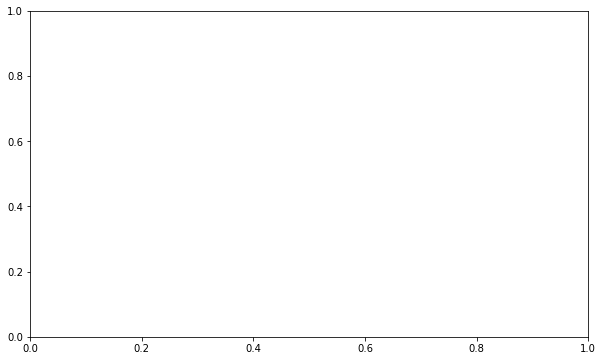

In [157]:
###
###
    # VISUALIZATION BY KIBET, THROWS ERROR NEEDS ATTENTION
##
##
#visualizing ratings per tourist destination category 

# Group the ratings by category
grouped_data = df.groupby('category')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['category'].unique()
ratings = df['rating'].unique()
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
# Set the x-axis labels and ticks
ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
ax.set_xticklabels(ratings)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Rating Distribution by Category')
ax.legend(title='Category')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

* from the chart above it can be seen that `hotel` category had higher ratings with an average rate of `4.0` followed by `attraction` while restaurants had lowest ratings based on catratingsegories over `3.5` 
* Despite having good  the same too were rated poorly by customers hith `hotel` and `attraction` leading with rates of `1.5, 1.0` and `2.0` respectively. 

In [160]:
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities,RankingType,Location,Numerator,Denominator
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,"[{'id': '472673', 'name': 'Okavango Delta', 'a...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",45,[],[],,things to do,Okavango Delta,3,5
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 4, 'count2': 11, 'count3': 35, 'cou...",115,"[eland, animals]",[],,things to do,Gaborone,7,25
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",23,[],[],,things to do,Gaborone,5,25
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,"[{'id': '472669', 'name': 'Chobe National Park...","{'count1': 2, 'count2': 0, 'count3': 0, 'count...",34,"[the river, hippos, chobe]",[],,things to do,Chobe National Park,3,8
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 1, 'count3': 6, 'count...",29,"[bucket shower, game reserve, latrine, hartebe...",[],,things to do,Gaborone,8,25


## Modelling

## Model Evaluation

## Tuning

## Deployment

## Conclusion and Recommendations